In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('dataset/modeling_data.csv')

In [13]:
df_process = df.copy()

In [14]:
# selection des variables
selected_cols = ['duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'contact_telephone',
       'month_may', 'poutcome_success']

In [15]:
df_utils = df_process[selected_cols].copy()

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

inertia = []
silhouette_avg = []
db_index_avg = []

cluster_range = range(2,11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_utils.values)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score((df_utils.values), kmeans.labels_)
    silhouette_avg.append(silhouette)
    db_index = davies_bouldin_score((df_utils.values), kmeans.labels_)
    db_index_avg.append(db_index)

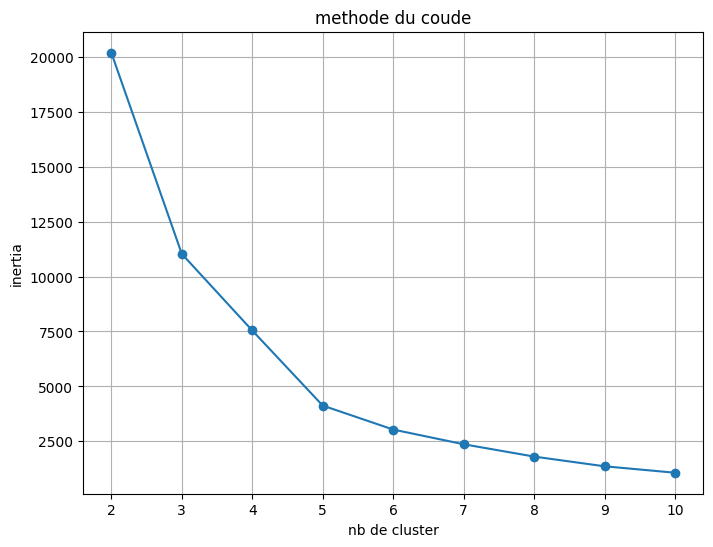

In [17]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('methode du coude')
plt.xlabel('nb de cluster')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

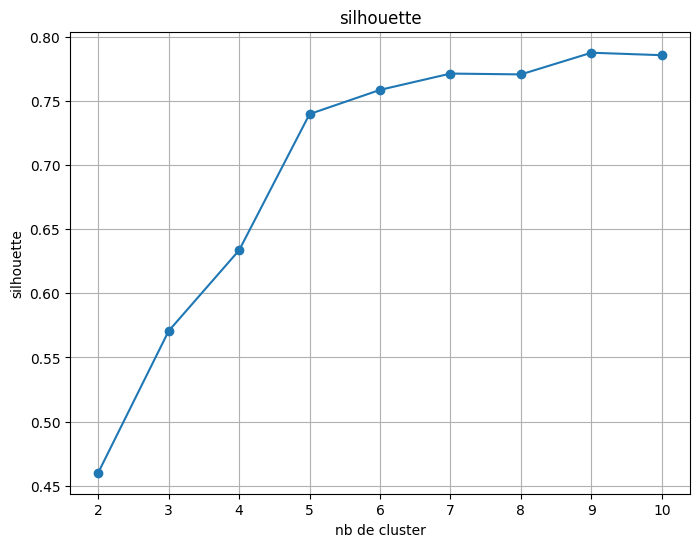

In [18]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, silhouette_avg, marker='o')
plt.title('silhouette')
plt.xlabel('nb de cluster')
plt.ylabel('silhouette')
plt.grid(True)
plt.show()

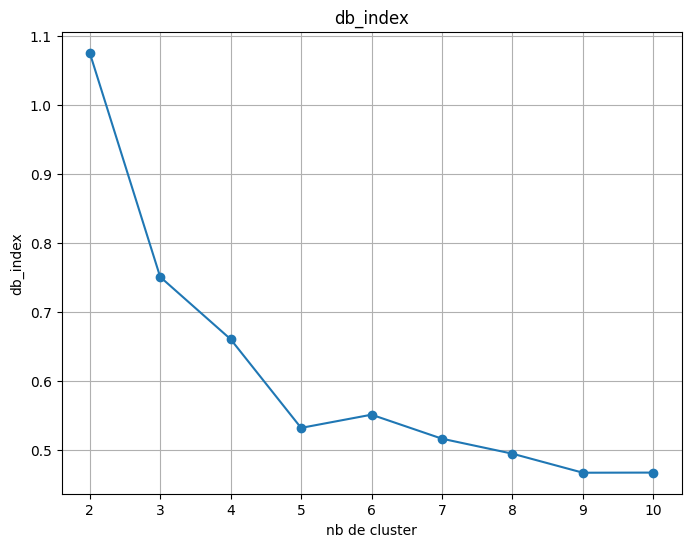

In [19]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, db_index_avg, marker='o')
plt.title('db_index')
plt.xlabel('nb de cluster')
plt.ylabel('db_index')
plt.grid(True)
plt.show()